## Open the data file and study the general information. 

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from functools import reduce
import seaborn as sns
import numpy as np 
import math

In [2]:
# Load the data

try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

 **Data exploration**

**Description of the data**

—Name

—Platform

—Year_of_Release

—Genre

—NA_sales (North American sales in USD million)

—EU_sales (sales in Europe in USD million)

—JP_sales (sales in Japan in USD million)

—Other_sales (sales in other countries in USD million)

—Critic_Score (maximum of 100)

—User_Score (maximum of 10)

—Rating (ESRB)

Data for 2016 may be incomplete.

Let's explore our data and check for potential issues with it.

Let's see how many rows and columns our dataset has and print the first 10 rows for it.

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Get info on data
There are several issues indetified with the data:
1. Upper cases in column names - we should change it to lowercase.
2. Some missing data in several columns - we will conclude whether to fill them or not in the next step.
3. Year of release is in 'float' type - we should convert data to 'int' type (and fill in missing values before) - just for visual convenience.
4. 'User_Score' column is in 'object' type - we will convirt it to 'float' type.

## Prepare the data

Let's replace the column names (make them lowercase)

In [5]:
games.columns= games.columns.str.lower()

In [6]:
# Convert 'year_of_release' column to 'int' type 
# There are some missing data - so we fill in them with '0' as it seems that year of release can't effect the success of the game
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Let's make a conclusion about necessity of filling missing values column by column:

- 'name'- only two are missing, we should drop them

- 'genre' - the same as for 'name'

- 'user_score' - change type to 'float'

- 'rating'- let's fill in 'nan' values with 'no info'

In [7]:
# Dropping of missing values in 'name'
games = games.dropna(subset = ['name'])
games['rating'] = games['rating'].fillna("no info")
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
# Let's calculate the total sales (the sum of sales in all regions) for each game:
games['total_sales'] = games.loc[:, 'na_sales':'other_sales'].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no info,31.38


In [9]:
# Let's check 'user_score' column for unique values
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There is 'tbd' (to be determined) values - they are just the same as missing values for us - so let's replace them with 'nan' in order to make data ready for analysis. In the real life it can be useful to update the dataset with open sources or to request corresponding info from Client.

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [11]:
# Convert 'user_score' column type to 'float'
# Filling in missing values in 'user_score' column with mean value for corresponding value

games['user_score'] = pd.to_numeric(games['user_score'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [12]:
# Let's look at values in 'rating' column
games['rating'].unique()

array(['E', 'no info', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [13]:
# Let's check if there is any duplicates in data
print(games.duplicated().sum())

0


No duplicates were identified.

## Analyse the data <a id='intro'></a>


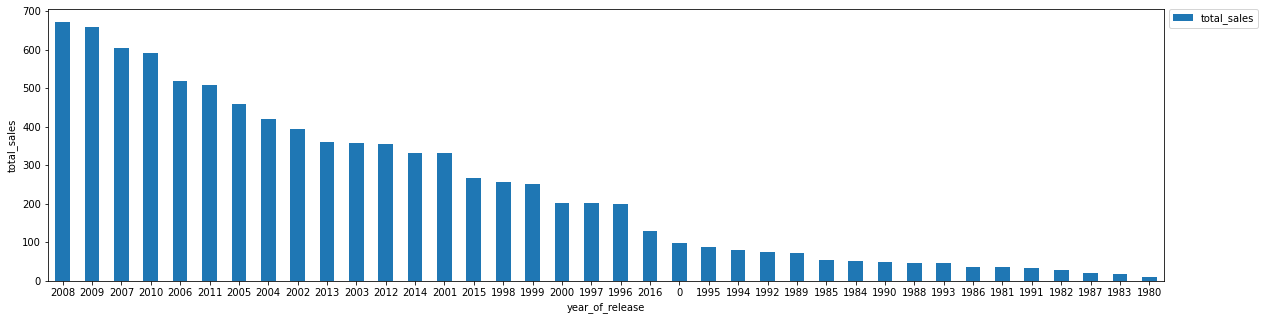

In [14]:
# Let's look at how many games were released in different years 

games_pivot = games.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by=['total_sales'], ascending=False)

ax = games_pivot.plot(kind='bar', ylabel='total_sales', figsize=(20, 5), rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

We can see from the plot above that amount of games before the year 1996 was not very significant (not more than 100 games per year)

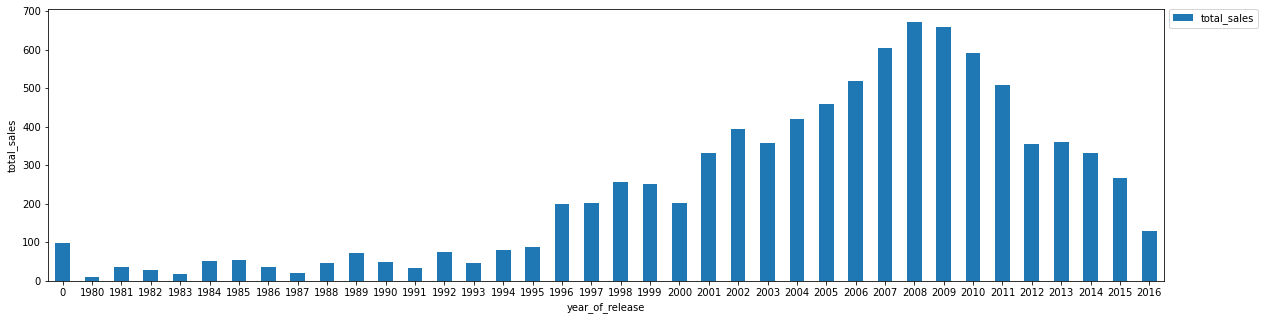

In [15]:
# Let's look at how many games were released in different years chronologically

games_pivot = games.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by=['year_of_release'])

ax = games_pivot.plot(kind='bar', ylabel='total_sales', figsize=(20, 5), rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

We can see staged grouth from year to year with  a peak in 2008-2009 and further recession.

The stable grouth of sales can be noticed from the year 2003.

Let's look at how sales varied from platform to platform. We'll chose the platforms with the greatest total sales and build a distribution based on data for each year

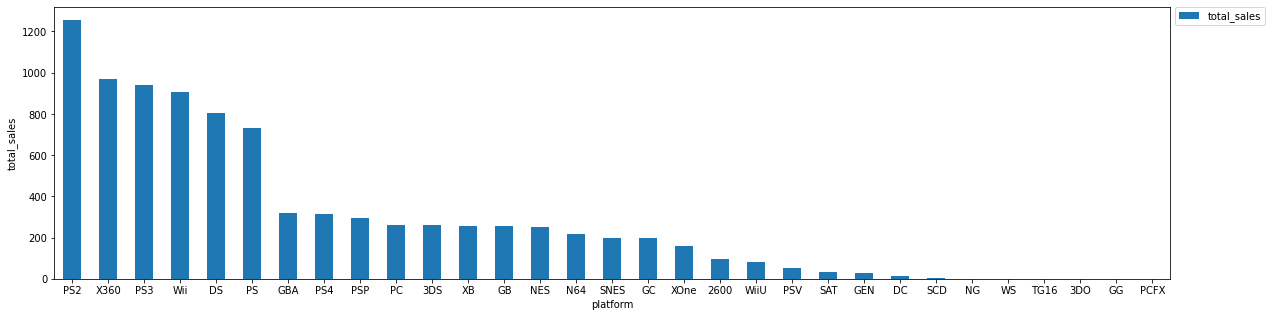

In [16]:
platform_pivot = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by=['total_sales'], ascending=False)
graph = platform_pivot.plot(kind='bar', ylabel='total_sales', figsize=(20, 5), rot=0)
graph.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

From the plot above the most popular platforms with sales greater than 700 are: PS2, X360, PS3, Wii, DS, PS.

We'll build a distribution based on data for each year.

In [17]:
popular_games = games.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS" or platform == "PS"')
popular_games['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

In [18]:
popular_games_pivot = popular_games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
popular_games_pivot_1 = popular_games_pivot.query('year_of_release > 0')
popular_games_pivot_1.head()

,platform,year_of_release,total_sales
1,DS,1985,0.02
2,DS,2004,17.27
3,DS,2005,130.14
4,DS,2006,119.81
5,DS,2007,146.94


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

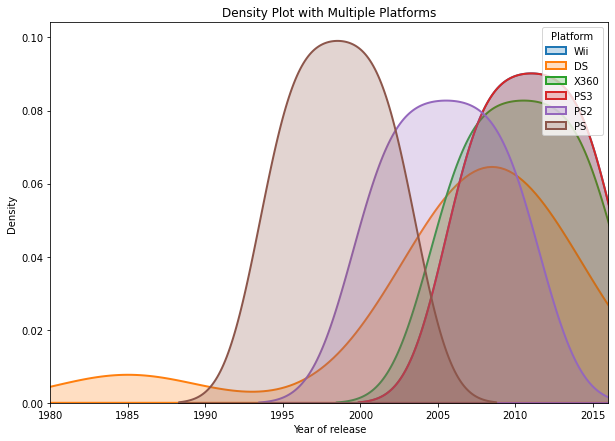

In [19]:
# List of six platforms to plot
platforms = ['Wii', 'DS', 'X360','PS3', 'PS2', 'PS']
plt.figure(figsize=(10,7))
# Iterate through the six platforms
for platform in platforms:
    # Subset to the platform
    subset = popular_games_pivot_1[popular_games_pivot_1['platform'] == platform]
    
    # Draw the density plot
   
    sns.distplot(subset['year_of_release'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 2},
                 label = platform)
  
# Plot formatting
plt.xlim(1980,2016)
plt.legend(prop={'size': 10}, title = 'Platform')
plt.title('Density Plot with Multiple Platforms')
plt.xlabel('Year of release')
plt.ylabel('Density')

We can make several conclusions from the plot above. For example:

- DS platform was one of the first but not so successful as others

- PS platform has the greatest sales but in prevoius periods, now it doesn't sell anyting

- PS 3 platform appeared later than others but it's the most successfull now.

- It takes from 1 to 5 years for new platform to appear in general (since 1990-es)

- Averege lifetime of a platform is about 20 years in general

Let's identify potentially profitable platforms. We'll check platforms with 2016 year of release for profitability.

In [20]:
games_2016 = games.query('year_of_release==2016').groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).sort_values(by=['total_sales'], ascending=False).reset_index()
games_2016.head()

,platform,year_of_release,total_sales
0,PS4,2016,69.25
1,XOne,2016,26.15
2,3DS,2016,15.14
3,PC,2016,5.25
4,WiiU,2016,4.60


In [21]:
games_ps4 = games.query('platform=="PS4"')['year_of_release'].min()
print(games_ps4)

2013


It seems that we should analyse data with the year of release not older than 2013. 
We have PS4 as the most popular in 2016. And the year of release of PS4 is 2013. 
Let's make a dataset with these years only.

In [22]:
games_2013 = games.query('year_of_release>=2013').groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by=['total_sales'], ascending=False).reset_index()
games_2013.head()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


We can see from the table above 3 potentially profitable platforms:

- PS4

- PS3

- XOne

Let's investigate global sales for these platforms more precisely.

/tmp/ipykernel_135/3651137573.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['PS4', 'PS3', 'XOne'])


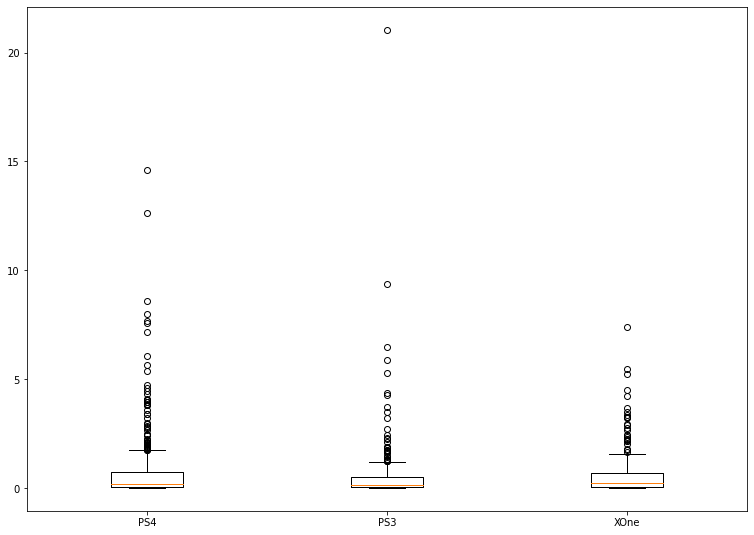

In [23]:
#Creating datatset
games_for_boxplot = games.query('year_of_release>=2013').groupby(['platform', 'name']).agg({'total_sales':'sum'}).sort_values(by=['total_sales'], ascending=False).reset_index()
data_1 = games_for_boxplot.query('platform == "PS4"')['total_sales']
data_2 = games_for_boxplot.query('platform == "PS3"')['total_sales']
data_3 = games_for_boxplot.query('platform == "XOne"')['total_sales']
data = [data_1, data_2, data_3]

fig = plt.figure(figsize =(10,7))

#Creating axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['PS4', 'PS3', 'XOne'])

#Creating plot
bp = ax.boxplot(data)

#Show plot
plt.show()

There are some outliers in our data - for all popular platforms there are several huge total sales. We do not need to remove them as we wouldn't use the pivot for further analysis. On the other hand, we are still able to make a conclusions about averages.

Differences of total sales for platforms analysed are not significant as well as average sales. 

Let's take a look at how user and professional reviews affect sales for PS3 platform. We'll build a scatter plot and calculate the correlation between ratings and sales.

In [24]:
ps3_corr = games.query('year_of_release >= 2013').loc[games['platform'] == "PS3", ['critic_score', 'user_score','total_sales']]
print(ps3_corr.corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.599920     0.334285
user_score        0.599920    1.000000     0.002394
total_sales       0.334285    0.002394     1.000000


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

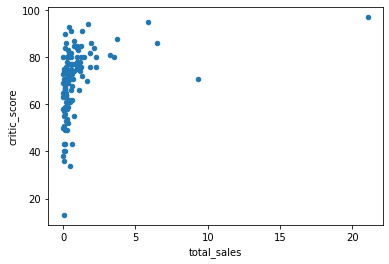

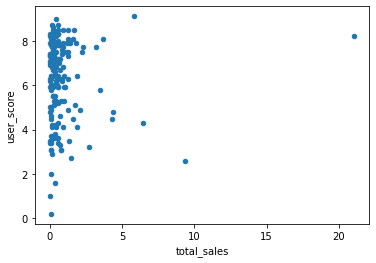

In [25]:
ps_3 = games.query('platform == "PS3" and year_of_release >= 2013')
ps_3.plot(x = 'total_sales', y='critic_score', kind='scatter')
ps_3.plot(x = 'total_sales', y='user_score', kind='scatter')

From the correlation matrix above: there is strong correlation index between user and critic score, but not between total sales of the platform and any score (corr index of 60% between user and critic score and 0.02% and 33% between total sales and user and critic score correspondingly). Probably not all the popular games are actually reviewed by critics and users or we just don't have access to this info in the dataset.

Let's compare the results with other popular platforms.

In [26]:
x_one_corr = games.query('year_of_release >= 2013').loc[games['platform'] == "XOne", ['critic_score', 'user_score','total_sales']]
print(x_one_corr.corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.472462    1.000000    -0.068925
total_sales       0.416998   -0.068925     1.000000


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

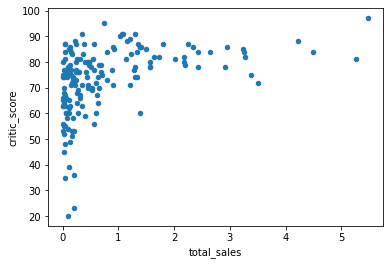

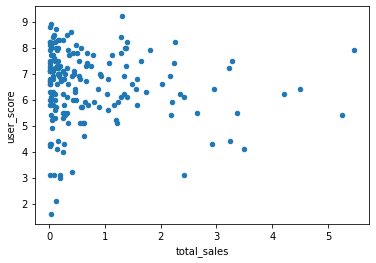

In [27]:
x_one = games.query('platform == "XOne" and year_of_release >= 2013 ')
x_one.plot(x = 'total_sales', y='critic_score', kind='scatter')
x_one.plot(x = 'total_sales', y='user_score', kind='scatter')

In [28]:
ps4_corr = games.query('year_of_release >= 2013').loc[games['platform'] == "PS4", ['critic_score', 'user_score','total_sales']]
print(ps4_corr.corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

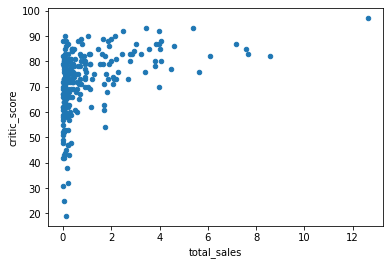

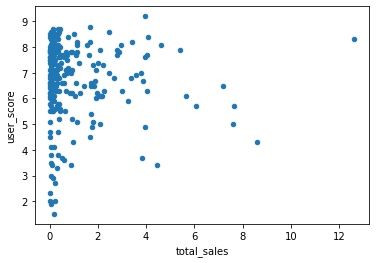

In [29]:
ps4 = games.query('platform == "PS4" and year_of_release>=2013')
ps4.plot(x = 'total_sales', y='critic_score', kind='scatter')
ps4.plot(x = 'total_sales', y='user_score', kind='scatter')

There is also high correlation index between user and critic score for XOne and PS4, but not between total sales of the platforms and any score.

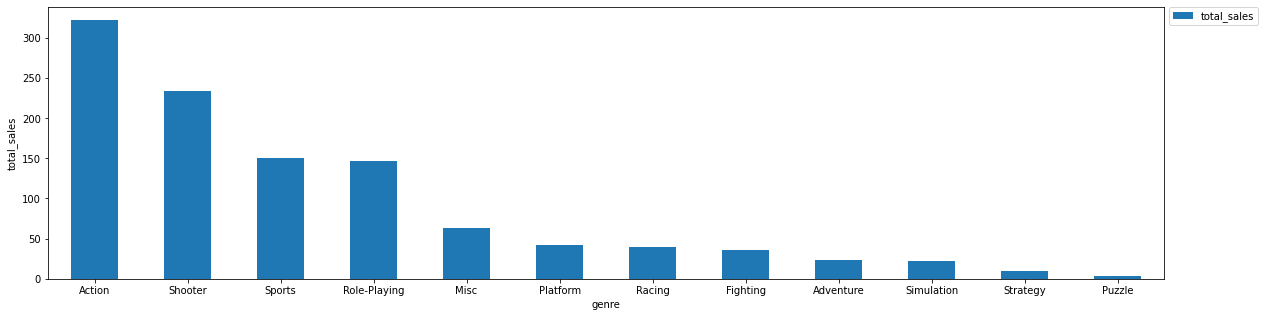

In [30]:
# Let's take a look at the general distribution of games by genre 

genres_pivot = games.query('year_of_release >= 2013').pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by=['total_sales'], ascending=False)
ax = genres_pivot.plot(kind='bar', ylabel='total_sales', figsize=(20, 5), rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

As we can see from the plot above, the most profitable genres are Action, Shooter and Sports while Puzzle, Strategy and Advenrute have the lowest sales.


Let's investigate total sales for the most popular genres more precisely.

/tmp/ipykernel_135/1249188295.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'])


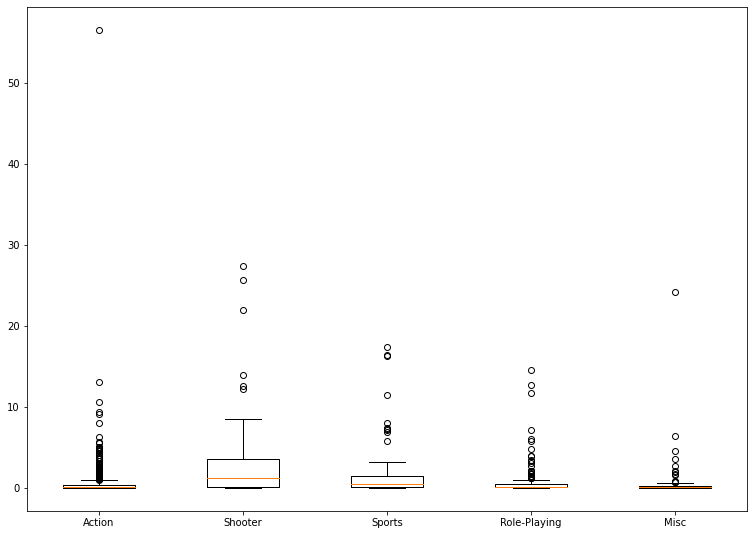

In [31]:
#Creating datatset
genres_pivot1 = games.query('year_of_release >= 2013').pivot_table(index=['genre', 'name'], values='total_sales', aggfunc='sum').sort_values(by=['total_sales'], ascending=False)
data_4 = genres_pivot1.query('genre == "Action"')['total_sales']
data_5 = genres_pivot1.query('genre == "Shooter"')['total_sales']
data_6 = genres_pivot1.query('genre == "Sports"')['total_sales']
data_7 = genres_pivot1.query('genre == "Role-Playing"')['total_sales']
data_8 = genres_pivot1.query('genre == "Misc"')['total_sales']
data_boxplot = [data_4, data_5, data_6, data_7, data_8]

fig = plt.figure(figsize =(10,7))

#Creating axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'])

#Creating plot
bp = ax.boxplot(data_boxplot)

#Show plot
plt.show()

Average total sales for games slightly differ from total sales by genre. For example, total sales of 'Action' genre are higher than 'Shooter', but average sales of the latest one are higher.


## Create a user profile for each region

For each region (NA, EU, JP) we will determine:

- The top five platforms. Describe variations in their market shares from region to region.

- The top five genres. Explain the difference

- Do ESRB ratings affect sales in individual regions?

In [32]:
# Top five platforms for each region and conclusions
data = games.query('year_of_release >= 2013')
games_na_pivot = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).reset_index()
games_na_pivot['platform_share'] = games_na_pivot['na_sales']/(games_na_pivot['na_sales']).sum()

games_na_pivot.head()


,platform,na_sales,platform_share
0,PS4,108.74,0.248429
1,XOne,93.12,0.212744
2,X360,81.66,0.186562
3,PS3,63.50,0.145073
4,3DS,38.20,0.087272


Let's create top 5 platform piecharts for each region/genre/rating.

/tmp/ipykernel_135/2196350196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['platform2'] = data.platform.apply(lambda x: x if x in top_5_platform else 'others')


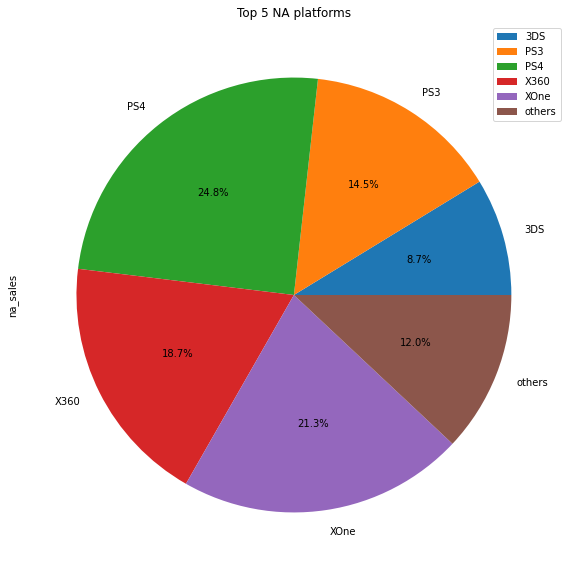

In [33]:
top_5_platform = games_na_pivot['platform'][:5].tolist()

data['platform2'] = data.platform.apply(lambda x: x if x in top_5_platform else 'others')
data.platform2.value_counts()

na_sales2 = data.pivot_table(index = 'platform2', values = 'na_sales', aggfunc = 'sum').reset_index()
na_sales2


na_sales2.plot(kind = 'pie', y = 'na_sales', labels = na_sales2['platform2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 NA platforms")
plt.show()

In [34]:
games_eu_pivot = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).reset_index()
games_eu_pivot['platform_share'] = games_eu_pivot['eu_sales']/sum(games_eu_pivot['eu_sales'])
games_eu_pivot.head()

,platform,eu_sales,platform_share
0,PS4,141.09,0.359712
1,PS3,67.81,0.172883
2,XOne,51.59,0.131530
3,X360,42.52,0.108406
4,3DS,30.96,0.078933


/tmp/ipykernel_135/1700749476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['platform2'] = data.platform.apply(lambda x: x if x in top_5_platform else 'others')


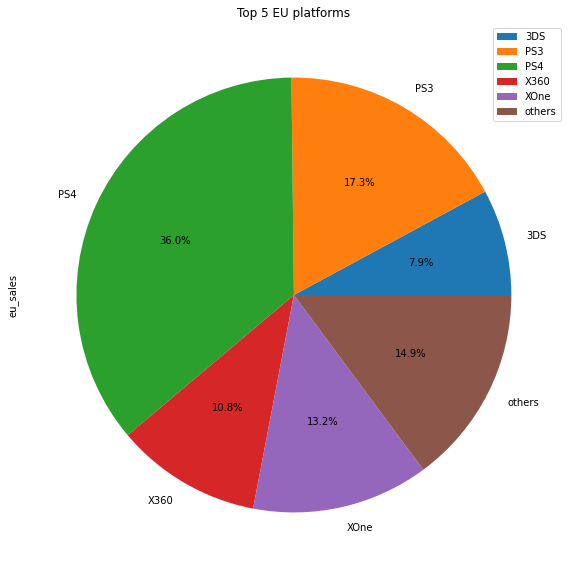

In [35]:
top_5_platform = games_eu_pivot['platform'][:5].tolist()

data['platform2'] = data.platform.apply(lambda x: x if x in top_5_platform else 'others')
data.platform2.value_counts()

eu_sales2 = data.pivot_table(index = 'platform2', values = 'eu_sales', aggfunc = 'sum').reset_index()
eu_sales2

eu_sales2.plot(kind = 'pie', y = 'eu_sales', labels = eu_sales2['platform2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 EU platforms")
plt.show()


In [36]:
games_jp_pivot = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).reset_index()
games_jp_pivot['platform_share'] = games_jp_pivot['jp_sales']/sum(games_jp_pivot['jp_sales'])
games_jp_pivot.head()

,platform,jp_sales,platform_share
0,3DS,67.81,0.481674
1,PS3,23.35,0.165862
2,PSV,18.59,0.132050
3,PS4,15.96,0.113368
4,WiiU,10.88,0.077284


/tmp/ipykernel_135/120270503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['platform2'] = data.platform.apply(lambda x: x if x in top_5_platform else 'others')


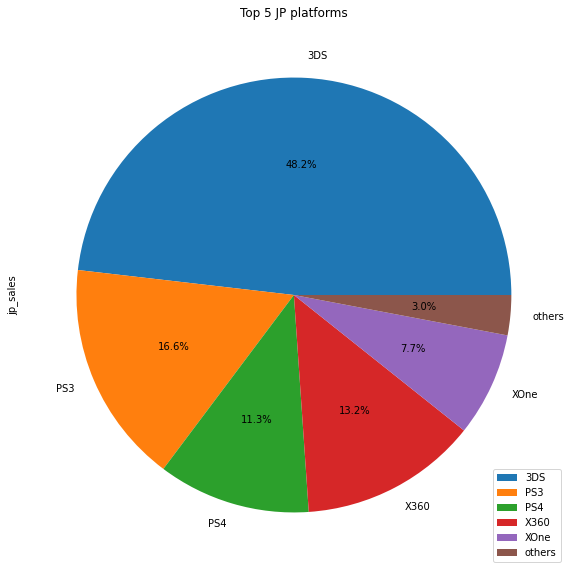

In [37]:
top_5_platform = games_jp_pivot['platform'][:5].tolist()

data['platform2'] = data.platform.apply(lambda x: x if x in top_5_platform else 'others')
data.platform2.value_counts()

jp_sales2 = data.pivot_table(index = 'platform2', values = 'jp_sales', aggfunc = 'sum').reset_index()
jp_sales2

jp_sales2.plot(kind = 'pie', y = 'jp_sales', labels = eu_sales2['platform2'], autopct='%1.1f%%', figsize = (20,10), title = "Top 5 JP platforms")
plt.show()

As we can see from pivot tables above, different platforms are popular in defferent regions. 

PS4 is the most popular platfrom in NA and EU, while in JP it's 3DS (almost half of total sales). 

Top 5 is equal for NA and EU. PSV and WiiU not included in top 5 for NA and EU are popular in JP.



In [38]:
# Top five genres for each region and conclusions
genre_na_pivot = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).reset_index()
genre_na_pivot['genre_share'] = genre_na_pivot['na_sales']/sum(genre_na_pivot['na_sales'])
genre_na_pivot.head()

,genre,na_sales,genre_share
0,Action,126.05,0.287976
1,Shooter,109.74,0.250714
2,Sports,65.27,0.149117
3,Role-Playing,46.40,0.106006
4,Misc,27.49,0.062804


/tmp/ipykernel_135/59932035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre2'] = data.genre.apply(lambda x: x if x in top_5_genre else 'others')


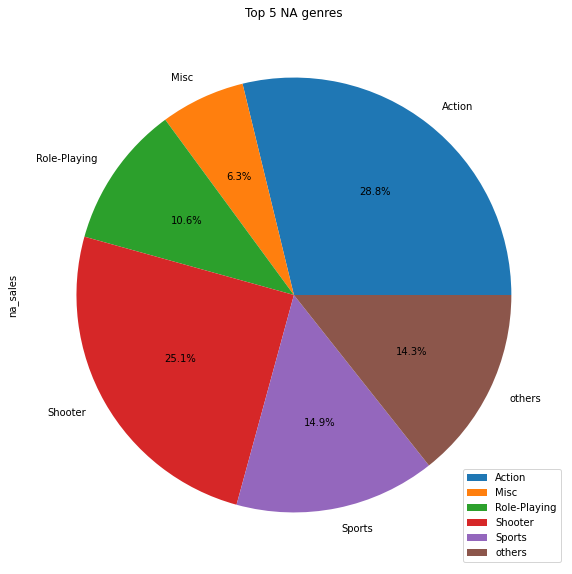

In [39]:
top_5_genre = genre_na_pivot['genre'][:5].tolist()

data['genre2'] = data.genre.apply(lambda x: x if x in top_5_genre else 'others')
data.genre2.value_counts()

na_sales2 = data.pivot_table(index = 'genre2', values = 'na_sales', aggfunc = 'sum').reset_index()
na_sales2

na_sales2.plot(kind = 'pie', y = 'na_sales', labels = na_sales2['genre2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 NA genres")
plt.show()

In [40]:
genre_eu_pivot = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).reset_index()
genre_eu_pivot['genre_share'] = genre_eu_pivot['eu_sales']/sum(genre_eu_pivot['eu_sales'])
genre_eu_pivot.head()


,genre,eu_sales,genre_share
0,Action,118.13,0.301175
1,Shooter,87.86,0.224001
2,Sports,60.52,0.154297
3,Role-Playing,36.97,0.094256
4,Racing,20.19,0.051475


/tmp/ipykernel_135/1841784471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre2'] = data.genre.apply(lambda x: x if x in top_5_genre else 'others')


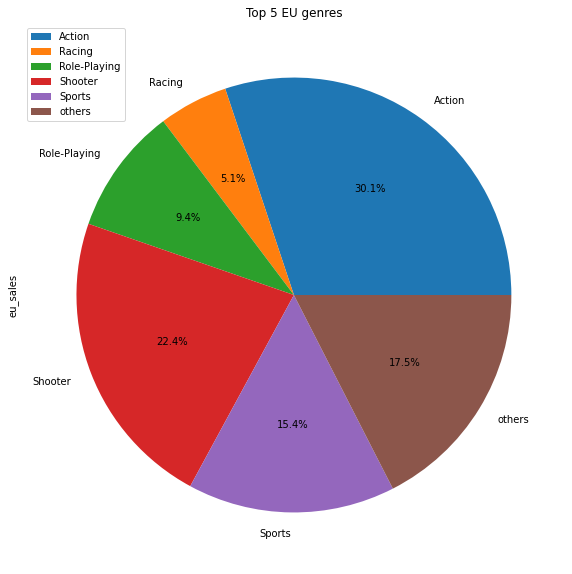

In [41]:
top_5_genre = genre_eu_pivot['genre'][:5].tolist()

data['genre2'] = data.genre.apply(lambda x: x if x in top_5_genre else 'others')
data.genre2.value_counts()

eu_sales2 = data.pivot_table(index = 'genre2', values = 'eu_sales', aggfunc = 'sum').reset_index()
eu_sales2

eu_sales2.plot(kind = 'pie', y = 'eu_sales', labels = eu_sales2['genre2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 EU genres")
plt.show()

In [42]:
genre_jp_pivot = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).reset_index()
genre_jp_pivot['genre_share'] = genre_jp_pivot['jp_sales']/sum(genre_jp_pivot['jp_sales'])
genre_jp_pivot.head()

,genre,jp_sales,genre_share
0,Role-Playing,51.04,0.362551
1,Action,40.49,0.287612
2,Misc,9.20,0.065350
3,Fighting,7.65,0.054340
4,Shooter,6.61,0.046953


/tmp/ipykernel_135/2607414273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre2'] = data.genre.apply(lambda x: x if x in top_5_genre else 'others')


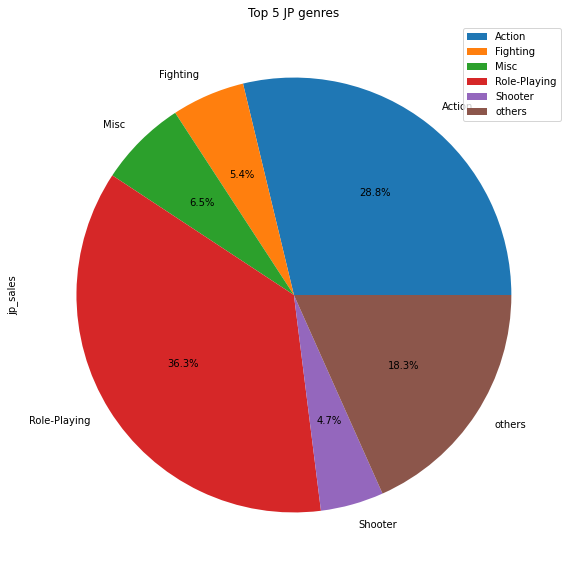

In [43]:
top_5_genre = genre_jp_pivot['genre'][:5].tolist()

data['genre2'] = data.genre.apply(lambda x: x if x in top_5_genre else 'others')
data.genre2.value_counts()

jp_sales2 = data.pivot_table(index = 'genre2', values = 'jp_sales', aggfunc = 'sum').reset_index()
jp_sales2

jp_sales2.plot(kind = 'pie', y = 'jp_sales', labels = jp_sales2['genre2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 JP genres")
plt.show()

Structure of users preferences is quite similar for NA and EU, the most popular genre is Action, middle genres are the same (Sport, Shooter, Role-Playing), the last ones in top five are different.

Role-playing is the most popular genre in JP.


In [44]:
rating_na_pivot = data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).reset_index()
rating_na_pivot['rating_share'] = rating_na_pivot['na_sales']/sum(rating_na_pivot['na_sales'])
rating_na_pivot.head()

,rating,na_sales,rating_share
0,M,165.21,0.377442
1,no info,89.42,0.204291
2,E,79.05,0.180599
3,E10+,54.24,0.123918
4,T,49.79,0.113751


/tmp/ipykernel_135/1751818485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating2'] = data.rating.apply(lambda x: x if x in top_5_rating else 'others')


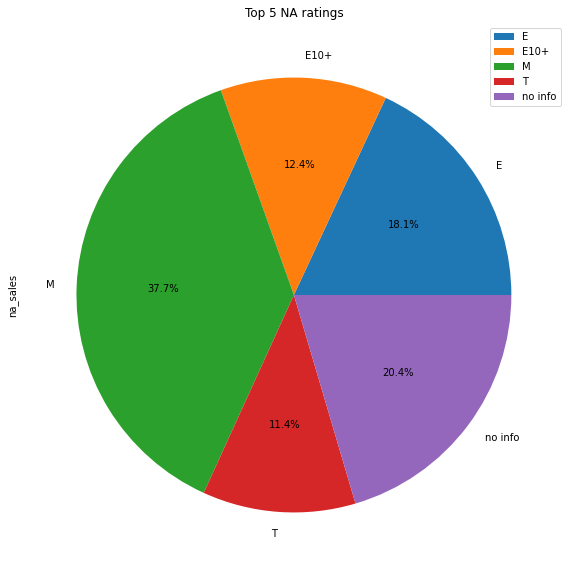

In [45]:
# Top five ESRB ratings and conclusions
top_5_rating = rating_na_pivot['rating'][:5].tolist()

data['rating2'] = data.rating.apply(lambda x: x if x in top_5_rating else 'others')
data.rating2.value_counts()

na_sales2 = data.pivot_table(index = 'rating2', values = 'na_sales', aggfunc = 'sum').reset_index()
na_sales2

na_sales2.plot(kind = 'pie', y = 'na_sales', labels = na_sales2['rating2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 NA ratings")
plt.show()

In [46]:
rating_eu_pivot = data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).reset_index()
rating_eu_pivot['rating_share'] = rating_eu_pivot['eu_sales']/sum(rating_eu_pivot['eu_sales'])
rating_eu_pivot.head()

,rating,eu_sales,rating_share
0,M,145.32,0.370497
1,E,83.36,0.212528
2,no info,78.91,0.201183
3,E10+,42.69,0.108839
4,T,41.95,0.106953


/tmp/ipykernel_135/4211661923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating2'] = data.rating.apply(lambda x: x if x in top_5_rating else 'others')


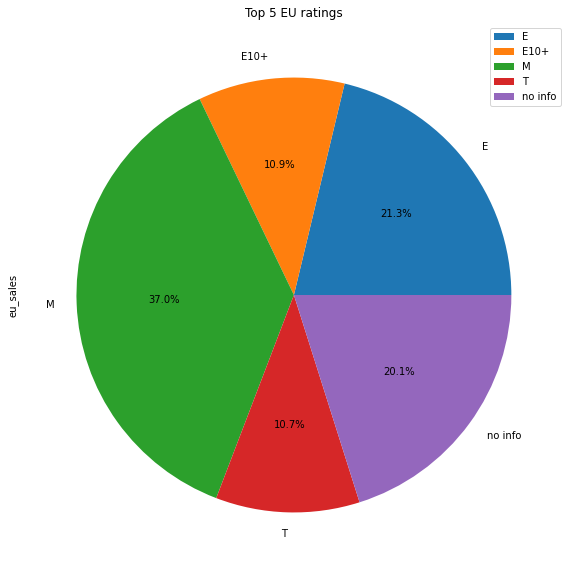

In [47]:
top_5_rating = rating_eu_pivot['rating'][:5].tolist()

data['rating2'] = data.rating.apply(lambda x: x if x in top_5_rating else 'others')
data.rating2.value_counts()

eu_sales2 = data.pivot_table(index = 'rating2', values = 'eu_sales', aggfunc = 'sum').reset_index()
eu_sales2

eu_sales2.plot(kind = 'pie', y = 'eu_sales', labels = eu_sales2['rating2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 EU ratings")
plt.show()

In [48]:
rating_jp_pivot = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).reset_index()
rating_jp_pivot['rating_share'] = rating_jp_pivot['jp_sales']/rating_jp_pivot['jp_sales'].sum()
rating_jp_pivot.head(10)

,rating,jp_sales,rating_share
0,no info,85.05,0.604134
1,T,20.59,0.146257
2,E,15.14,0.107544
3,M,14.11,0.100227
4,E10+,5.89,0.041838


/tmp/ipykernel_135/2392693235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating2'] = data.rating.apply(lambda x: x if x in top_5_rating else 'others')


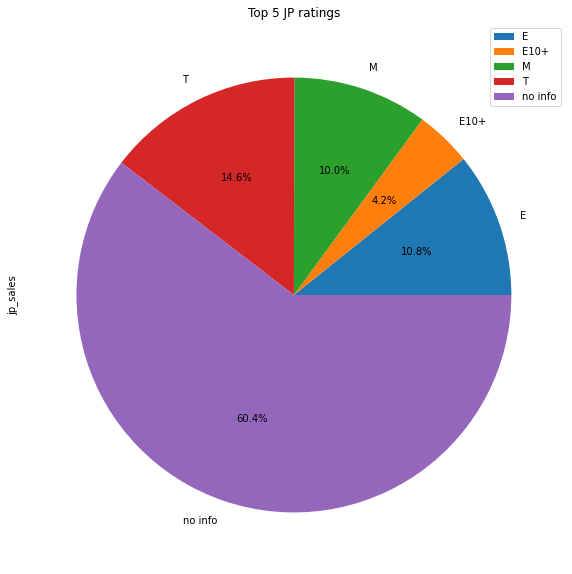

In [49]:
top_5_rating = rating_jp_pivot['rating'][:5].tolist()

data['rating2'] = data.rating.apply(lambda x: x if x in top_5_rating else 'others')
data.rating2.value_counts()

jp_sales2 = data.pivot_table(index = 'rating2', values = 'jp_sales', aggfunc = 'sum').reset_index()
jp_sales2

jp_sales2.plot(kind = 'pie', y = 'jp_sales', labels = jp_sales2['rating2'],autopct='%1.1f%%', figsize = (20,10), title = "Top 5 JP ratings")
plt.show()

The most popular rating for NA and EU is 'M' (Mature 17+). 

At the same time more than half of the games (60%) has no info about rating in JP (next popular rating for JP is 'T' (Teen)).

Ratings included in top 5 are similar for each region (the distribution of each rating inside the list is different).


## Test the hypotheses

Let's test the hypotheses that average user ratings of the Xbox One and PC platforms are the same.

We'll take two samples of data (for two platforms) and compare average user rating for them.

H0: average of sample 1 is equal to average of sample 2

H1: average of sample 1 is not equal to average of sample 2

Let's prepare the data for this particular task - we will change type of 'user_score' column from 'object' to 'float'. We also need to drop strings with missed user score (in order to calculate p-value - it's impossible with 'NaN' values in the column).

In [50]:
games['user_score'] = pd.to_numeric(games['user_score'])
games = games.dropna(subset = ['user_score'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7590 non-null   object 
 1   platform         7590 non-null   object 
 2   year_of_release  7590 non-null   int64  
 3   genre            7590 non-null   object 
 4   na_sales         7590 non-null   float64
 5   eu_sales         7590 non-null   float64
 6   jp_sales         7590 non-null   float64
 7   other_sales      7590 non-null   float64
 8   critic_score     7017 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           7590 non-null   object 
 11  total_sales      7590 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 770.9+ KB


In [51]:
average_rating = games.query('year_of_release >= 2013 and (platform == "XOne" or platform == "PC")')

In [52]:
average_rating.groupby(['platform'])['user_score'].median()

platform
PC      6.8
XOne    6.8
Name: user_score, dtype: float64

In [53]:
xb=average_rating.query('platform=="XOne"')
pc=average_rating.query('platform=="PC"')

In [54]:
sample1=xb['user_score']
sample2=pc['user_score']

In [55]:
sample1

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [56]:
print(len(sample1))
print(len(sample2))

182
155


In [57]:
sample2.sample(155)

7873     8.6
11450    8.0
15851    8.7
4368     4.7
16025    4.3
        ... 
3212     6.5
15660    7.4
12719    2.9
14079    7.0
15980    5.3
Name: user_score, Length: 155, dtype: float64

In [58]:
from scipy import stats
alpha=0.05
p_value_levene=stats.levene(sample1, sample2).pvalue
if p_value_levene<alpha:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 \
  and sample 2 are not the same") 

Reject H0: variance of sample 1 is not equal to variance of sample 2


In [59]:
# As variances of samples seem to be different, we need to conduct a Welch’s t-test (add “False” in the “equal_var=” argument)
stats.ttest_ind(sample1, sample2, equal_var = False)

Ttest_indResult(statistic=1.45192815744488, pvalue=0.14759594013430463)

In [60]:
# We will set level of critical statistical significance alpha equal to common level of 5%
alpha=0.05
def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2, equal_var = False).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average  sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 

In [61]:
t_test(xb['user_score'],pc['user_score'],alpha=0.05)

Fail to Reject H0: We don't have enough evidence to say that averages of sample 1   and sample 2 are not the same


**Conclusion**: we don't have enough evidence to say that average user ratings of the Xbox One and PC platforms are not the same.

Next hypotheses we are going to test is that average user ratings for the Action and Sports genres are the same.

We'll take two samples of data (for two genres) and compare average user rating for them.

H0: average of sample 1 is equal to average of sample 2

H1: average of sample 1 is not equal to average of sample 2

In [62]:
genres_rating = games.query('year_of_release >= 2013 and (genre == "Action" or genre == "Sports")')

In [63]:
genres_rating.groupby(['genre'])['user_score'].median()

genre
Action    7.1
Sports    5.5
Name: user_score, dtype: float64

In [64]:
action=genres_rating.query('genre=="Action"')
sports=genres_rating.query('genre=="Sports"')

In [65]:
sample1=action['user_score']
sample2=sports['user_score']

In [66]:
sample1

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 389, dtype: float64

In [67]:
print(len(sample1))
print(len(sample2))

389
160


In [68]:
sample1.sample(160)

14159    7.5
15052    8.2
730      7.6
11629    7.6
4109     7.8
        ... 
2119     5.9
9806     6.9
13695    5.6
6037     6.3
2236     6.8
Name: user_score, Length: 160, dtype: float64

In [69]:
from scipy import stats
alpha=0.05
p_value_levene1=stats.levene(sample1, sample2).pvalue
if p_value_levene1<alpha:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 \
  and sample 2 are not the same") 

Reject H0: variance of sample 1 is not equal to variance of sample 2


In [70]:
# As variances of samples seem to be different, we need to conduct a Welch’s t-test (add “False” in the “equal_var=” argument)
stats.ttest_ind(sample1, sample2, equal_var = False )

Ttest_indResult(statistic=10.233428417448625, pvalue=1.4460039700704315e-20)

In [71]:
# We will set level of critical statistical significance alpha equal to common level of 5%
alpha=0.05
def t_test(sample3,sample4,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2, equal_var = False).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same")

In [72]:
t_test(action['user_score'],sports['user_score'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


**Conclusion**: we don't have enough evidence that average user ratings for the Action and Sports genres are the same.

## General conclusion

We have addressed all possible issues identified in the data received: missing values, duplicates, data types.

Some missing data was identified - we have drooped them for columns critical to our analysis ('user_score' column). 'name' column has only two missed values - so we dropped them out).

For data with wrong data types we have changed them (from 'object' to 'float' and from 'float' to 'int').

We have checked data for duplicates and dind't find any.

We have transformed initial datasets in order to calculate total sales of games of all analysed regions. All column names were set to lower case.

We have prepared hystograms for the dataset showing the distribution of total sales by year of release, by platform and genre. 
We identified the the most popular platforms with sales greater than 700: PS2, X360, PS3, Wii, DS, PS. Then we found the most popular platform released in 2016 and based on its year of release exclude all years before 2013 from our further analysis. 

While testing sales per region we have identified that clients in different regions prefer very similar platforms as well as game genres. Structure of users preferences is quite similar for NA and EU, the most popular genre is Action, all other genres are the same in top 5 except for 5th line - Misc and Racing correspondingly. Role-playing is the most popular genre in JP.

We have prepared box plots for the most profitable platform PS3, PS4 and XOne. They show that there is almost no difference between average sales for these platforms.

Using t-test we have checked the hypotheses that average user ratings of the Xbox One and PC platforms are the same. The result is that we can't reject this hypotheses - it means that user ratings for these platforms might be the same.

The second hypotheses we have checked is that average user ratings for the Action and Sports genres are the same. The result is that we reject this hypotheses - it means that user ratings for these genres might be different (Action might be more popular based on median value).